Useful posts:

[http://darribas.org/gds_scipy16/ipynb_md/04_esda.html]

[http://darribas.org/gds15/content/labs/lab_06.html]

In [ ]:
# ! pip install geopandas 

# conda install -c conda-forge geopandas
! pip install geopandas
! pip install descartes
! pip install pysal

# conda install -c anaconda pysal

## Start from below:

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd
import numpy as np
import os

from mpl_toolkits.axes_grid1 import make_axes_locatable
# import pysal as ps
# from pysal.contrib.viz import mapping as maps

In [98]:
# load data
dataPath = "/mnt/data/CES3/"
savePath = "/mnt/results/summarystats/"
if not os.path.exists(savePath):
    os.makedirs(savePath)

In [37]:
xls = pd.ExcelFile(dataPath+"CES3 - Bay Area.xlsx")
sheets = xls.sheet_names
print(sheets)

df = pd.read_excel(xls, sheet_name=sheets[0])
df_dict = pd.read_excel(xls, sheet_name=sheets[1],skiprows=range(0,6)).dropna(thresh=2)
df_demo = pd.read_excel(xls, sheet_name=sheets[3], header=None,
                        names=['Census Tract','CES 3.0 Score','CES 3.0 Percentile','CES 3.0 Percentile Range','Total Population',
                               'California County','Age:<10','Age:11-64','Age:>65', 'Race:Hispanic','Race:White','Race:AfricanAmerican',
                               'Race:NativeAmerican','Race:Aisan','Race:Other'],skiprows=[0]).dropna()


# # convert to geopandas
# gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
# gdf.head()

['CES 3.0 (2018 Update)', 'Data Dictionary', 'Missing&NAData', 'Demographic profile']


In [73]:
df_dict.head()

df_dict_temp = df_dict.dropna()
var_char = df_dict_temp[df_dict_temp['CalEnviroScreen Category'].str.contains('Population Characteristics')]['Variable Name'].drop_duplicates()
var_char = [v.rstrip() for v in var_char]
var_char.insert(0,'Census ID')
var_char

['Census ID',
 'Asthma',
 'Asthma Pctl',
 'Low Birth Weight',
 'Low Birth Weight Pctl',
 'Cardiovascular Disease',
 'Cardiovascular Disease Pctl',
 'Education',
 'Education Pctl',
 'Linguistic Isolation',
 'Linguistic Isolation Pctl',
 'Poverty',
 'Unemployment',
 'Unemployment Pctl',
 'Housing Burden',
 'Housing Burden Pctl']

In [75]:
print(len(df))
print(df.columns)
df.head()

1581
Index(['Census ID', 'Census Tract', 'Total Population', 'California County',
       'ZIP', 'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', ' CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       

,Census ID,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6001400100,4001.0,2937,Alameda,94704,Berkeley,-122.231903,37.867595,3.970573,1.866566,...,28.622850,7.6,3.570082,NaN,NaN,8.5,8.123889,8.192184,0.849584,0.819776
1,6001400200,4002.0,1974,Alameda,94618,Oakland,-122.249576,37.848171,1.810257,0.252239,...,0.000000,11.2,8.988058,2.2,1.129585,4.0,0.774308,4.697429,0.487155,0.063060
2,6001400300,4003.0,4865,Alameda,94618,Oakland,-122.254436,37.840598,12.041135,17.631479,...,54.939341,14.3,14.833438,8.8,45.970301,16.0,39.870526,30.040353,3.115385,20.267373
3,6001400400,4004.0,3703,Alameda,94609,Oakland,-122.257463,37.848211,10.912634,15.020810,...,16.651113,16.8,19.949717,3.3,3.553750,15.3,36.481340,27.968623,2.900533,17.379241
4,6001400500,4005.0,3517,Alameda,94609,Oakland,-122.264745,37.848517,18.549441,34.581914,...,16.651113,25.1,36.379635,6.5,24.660490,19.9,58.644326,49.270005,5.109628,48.846008


In [76]:
# get only the population characterics columns
df_popchar = df[var_char]
df_popchar

,Census ID,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl
0,6001400100,18.50,6.308440,2.99,8.676150,3.01,0.723102,1.7,4.277063,3.8,28.622850,7.6,NaN,NaN,8.5,8.123889
1,6001400200,24.27,14.636579,1.24,0.435730,3.98,4.525620,1.5,3.419127,0.0,0.000000,11.2,2.2,1.129585,4.0,0.774308
2,6001400300,37.93,38.311931,4.13,29.232347,4.42,7.505299,5.0,19.707292,8.9,54.939341,14.3,8.8,45.970301,16.0,39.870526
3,6001400400,60.86,69.928937,3.98,25.759323,4.89,11.569630,6.1,24.287156,2.3,16.651113,16.8,3.3,3.553750,15.3,36.481340
4,6001400500,110.37,94.651540,5.59,67.986672,7.55,44.458297,3.2,11.203634,2.3,16.651113,25.1,6.5,24.660490,19.9,58.644326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,6097154201,55.43,63.408553,4.26,32.397796,7.05,38.000249,29.6,76.091345,10.6,61.218504,55.8,6.9,28.150781,20.3,60.243717
1577,6097154202,55.17,63.096871,5.15,56.593618,7.02,37.526493,10.4,40.625789,2.7,20.050660,16.9,7.1,29.826120,11.5,18.761107
1578,6097154302,14.82,3.191622,4.60,41.394336,2.81,0.423887,5.6,22.230633,1.9,13.118251,35.1,7.9,37.669755,11.7,19.636964
1579,6097154303,7.60,0.236878,NaN,NaN,1.34,0.049869,2.7,8.730760,0.0,0.000000,16.0,4.5,9.366671,9.3,10.345265


In [103]:
# characteristics to plot on map:
char_on_map = np.array(df_popchar.columns[1:].tolist())
char_on_map

array(['Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Cardiovascular Disease',
       'Cardiovascular Disease Pctl', 'Education', 'Education Pctl',
       'Linguistic Isolation', 'Linguistic Isolation Pctl', 'Poverty',
       'Unemployment', 'Unemployment Pctl', 'Housing Burden',
       'Housing Burden Pctl'], dtype='<U27')

In [79]:
gdf = gpd.read_file(dataPath+"CES3June2018Update.shp")
gdf = gdf[gdf['tract'].isin(df['Census ID'])].reset_index(drop=True).rename(columns={'tract': 'Census ID'})

gdf = gdf.merge(df_popchar, on='Census ID')

In [80]:
print(len(gdf))
gdf.head()

1581


,Census ID,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl
0,6.085509e+09,4603,Santa Clara,94043,Mountain View,-122.074346,37.401206,19.89,38,0.035,...,30.270540,5.0,19.707292,4.6,33.902146,10.5,9.9,55.298896,21.5,65.143437
1,6.085510e+09,4688,Santa Clara,94022,Los Altos,-122.120112,37.392783,3.53,1,0.035,...,1.882558,2.4,7.418622,2.2,15.677910,5.8,3.5,4.251809,15.7,38.461538
2,6.085509e+09,3212,Santa Clara,94306,Palo Alto,-122.114454,37.406981,7.97,8,0.035,...,1.009849,3.8,14.042392,13.4,70.590588,15.2,5.2,14.151542,15.8,39.083524
3,6.085509e+09,3706,Santa Clara,94043,Mountain View,-122.092278,37.406030,17.20,31,0.035,...,33.038275,10.4,40.625789,19.7,83.922144,29.3,7.3,32.097982,17.1,45.925362
4,6.085503e+09,4311,Santa Clara,95122,San Jose,-121.822135,37.331408,32.60,64,0.038,...,81.885052,34.2,81.112793,15.1,74.656712,31.5,12.9,75.517198,17.5,47.994415


In [81]:
gdf.columns

Index(['Census ID', 'pop2010', 'California', 'ZIP', 'City', 'Longitude',
       'Latitude', 'CIscore', 'CIscoreP', 'ozone', 'ozoneP', 'pm', 'pmP',
       'diesel', 'dieselP', 'drink', 'drinkP', 'pest', 'pestP', 'RSEIhaz',
       'RSEIhazP', 'traffic', 'trafficP', 'cleanups', 'cleanupsP', 'gwthreats',
       'gwthreatsP', 'haz', 'hazP', 'iwb', 'iwbP', 'swis', 'swisP',
       'Pollution', 'PollutionS', 'PollutionP', 'asthma', 'asthmaP', 'lbw',
       'lbwP', 'cvd', 'cvdP', 'edu', 'eduP', 'ling', 'lingP', 'pov', 'povP',
       'unemp', 'unempP', 'housingB', 'housingBP', 'PopChar', 'PopCharSco',
       'PopCharP', 'Children_u', 'Pop_11_64_', 'Elderly_ov', 'Hispanic_p',
       'White_pct', 'African_Am', 'Native_Ame', 'Asian_Amer', 'Other_pct',
       'OBJECTID_1', 'CIdecile', 'CIvigintil', 'Shape_Leng', 'Shape_Area',
       'CES2018_Rn', 'geometry', 'Asthma', 'Asthma Pctl', 'Low Birth Weight',
       'Low Birth Weight Pctl', 'Cardiovascular Disease',
       'Cardiovascular Disease Pctl', 'E

## Population Characteristics of CES3 Bay Area

### Visulization of values on map

Unemployment
Unemployment Pctl
Housing Burden
Housing Burden Pctl


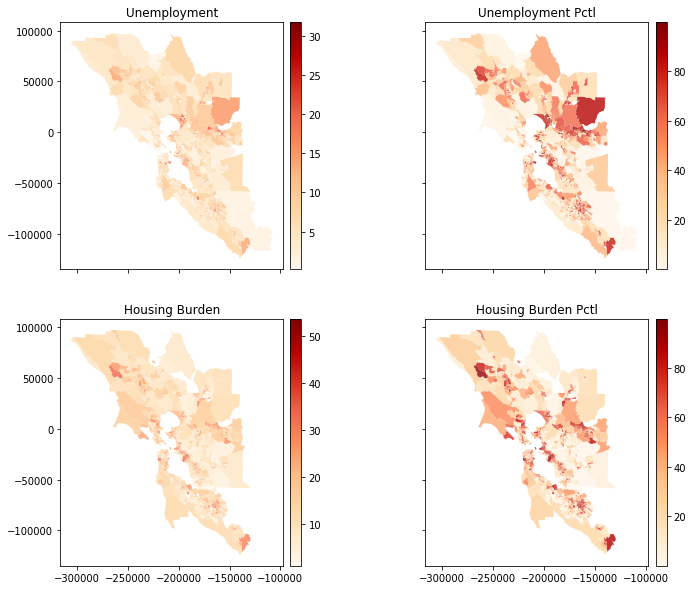

In [117]:

pop_char_idx = range(11,15)
features = char_on_map[pop_char_idx]

ncol = 2
numPlot = len(features)
nrow = int(np.ceil(numPlot/ncol))

fig, axs = plt.subplots(nrow, ncol, figsize=(12,5*nrow),sharex=True, sharey=True, squeeze=True)


for i,feature in enumerate(features):
    ax = axs[int(i/ncol),i%ncol]
#     ax = axs[i%nrow,int((i-i%nrow)/nrow)]  % uncomment to plot vertically
    print(feature)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    
    gdf.plot(ax=ax,column=feature,cmap='OrRd', cax=cax, legend=True, alpha=0.8)
    ax.set_title(feature)

if len(features)<nrow*ncol:
    fig.delaxes(axs[nrow-1][ncol-1])

ax.set_xlabel('')
ax.set_ylabel('')
# plt.show()
plt.savefig(savePath+"pop_char_{}.png".format("-".join([str(i) for i in pop_char_idx])),bbox_inches='tight')

### Summary statistics 

In [125]:
print("--Total number of rows--\n{}".format(len(df)))

# summary descriptoin
df[char_on_map].describe()

--Total number of rows--
1581


,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl
count,1581.000000,1581.000000,1556.000000,1556.000000,1581.000000,1581.000000,1567.000000,1567.000000,1544.000000,1544.000000,1569.000000,1557.000000,1557.000000,1558.000000,1558.000000
mean,54.393485,48.046246,4.836433,47.459582,7.126762,38.189719,12.598468,38.328888,9.536010,47.382612,25.475653,8.021516,36.857306,16.661297,41.388565
std,39.673848,31.768070,1.604300,29.669809,2.656628,27.846010,11.103430,25.506396,8.706476,27.740386,16.251128,3.997170,26.599974,7.584762,27.433085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.200000,0.038076,1.000000,0.025387
25%,26.170000,18.127416,3.750000,20.889402,5.090000,13.452188,4.300000,16.237699,3.100000,23.276896,12.600000,5.200000,14.151542,11.200000,17.580604
50%,42.220000,45.368408,4.790000,46.469307,6.710000,33.399825,9.100000,36.298259,7.500000,48.833489,21.500000,7.300000,32.097982,15.800000,39.083524
75%,67.350000,76.349582,5.832500,73.151352,8.720000,59.643436,17.650000,57.513248,13.200000,69.964005,35.300000,10.000000,56.111182,21.175000,63.839172
max,223.300000,99.975065,11.110000,99.935922,15.180000,98.030171,63.000000,99.015897,72.300000,100.000000,91.300000,31.700000,99.847696,53.800000,99.873064


In [126]:
# Number of NAs
print("--Number of NAs--")
print(df[char_on_map].isna().sum())

--Number of NAs--
Asthma                          0
Asthma Pctl                     0
Low Birth Weight               25
Low Birth Weight Pctl          25
Cardiovascular Disease          0
Cardiovascular Disease Pctl     0
Education                      14
Education Pctl                 14
Linguistic Isolation           37
Linguistic Isolation Pctl      37
Poverty                        12
Unemployment                   24
Unemployment Pctl              24
Housing Burden                 23
Housing Burden Pctl            23
dtype: int64


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


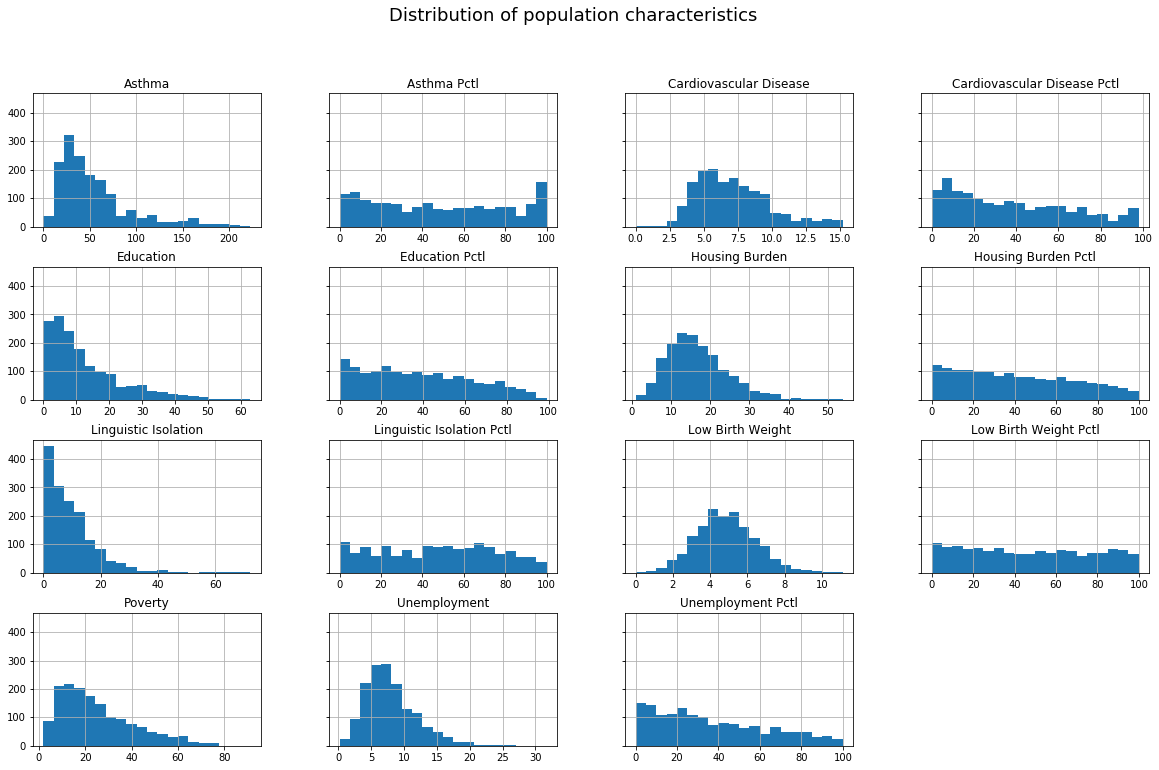

In [170]:
# plt.figure()
fig, ax = plt.subplots(figsize=(20,12))
df[char_on_map].hist(sharex=False, sharey=True,ax=ax,
                     layout=(4,4),bins=20)
fig.suptitle("Distribution of population characteristics",fontsize=18)
pass
fig.savefig(savePath+"pop_char_distribution.png",bbox_inches='tight')

In [ ]:
# pairwise relationships
pp = sns.pairplot(df[char_on_map])
pp.savefig(savePath+"pop_char_pairwise.png",bbox_inches='tight')

## Explore demographic information

In [74]:
df_demo.head()

,Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Age:<10,Age:11-64,Age:>65,Race:Hispanic,Race:White,Race:AfricanAmerican,Race:NativeAmerican,Race:Aisan,Race:Other
6.001400e+09,4001.0,3.970573,1.866566,1-5% (lowest scores),2937.0,Alameda,9.3,69.1,21.6,4,70.8,4.8,0.1,15.8,4.6
6.001400e+09,4002.0,1.810257,0.252239,1-5% (lowest scores),1974.0,Alameda,12,71.6,16.4,7.6,78.3,1.6,0.1,7.4,5
6.001400e+09,4003.0,12.041135,17.631479,15-20%,4865.0,Alameda,11.1,78.8,10.1,8.2,66.9,10.5,0.2,8.7,5.5
6.001400e+09,4004.0,10.912634,15.020810,15-20%,3703.0,Alameda,11.4,79.1,9.5,9,65.5,12.1,0.1,7.5,5.9
6.001400e+09,4005.0,18.549441,34.581914,30-35%,3517.0,Alameda,9,82.1,8.9,9.7,50.6,26.5,0.5,6,6.8


In [69]:
# plot

# feature = 'Ozone'
# gdf.plot(column=feature,cmap='OrRd', legend=True, figsize=(10,10))
# plt.title(feature)
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()